# CSP571 - Final Project

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from datetime import datetime

## Primary dataset: The Movies Dataset

<div style="color:blue">
    <p>This dataset consists of a collection of data from The Movie Database (TMDb) and GroupLens. <a href="https://www.themoviedb.org/">The Movie Database</a> is a user-editable database with data on millions of movies and TV shows, while <a href="https://grouplens.org/">GroupLens</a> is a movie recommender website with hundreds of thousands of registered users.</p>
    <p>The dataset is distributed in 7 separate files, containing metadata for 45,000 movies released on or before July 2017. The included files are as follows:</p>
    <ol>
        <li><b>movies_metadata.csv:</b> The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.</li>
        <li><b>keywords.csv:</b> Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.</li>
        <li><b>credits.csv:</b> Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.</li>
        <li><b>links.csv:</b> The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.</li>
        <li><b>links_small.csv</b> Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.</li>
        <li><b>ratings_small.csv</b> The subset of 100,000 ratings from 700 users on 9,000 movies.</li>
        <li><b>ratings.csv: </b> 26 million and 750,000 tag applications applied to 58,000 movies by 280,000 users.</li>
    </ol>
    <p>For our purpose, the relevant files of <a href="https://www.kaggle.com/rounakbanik/the-movies-dataset">The Movies Dataset</a> are files 1 and 7.</p>
</div>


<p style="color:blue">The contents of the <i>movies_metadata.csv</i> (file #1) are described below.</p>
<table>
    <thead>
        <tr>
            <th>Column name</th>
            <th>Column type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>adult</td>
            <td>Text (TRUE/FALSE)</td>
            <td>An indication of whether the movie is intended for an adult audience.</td>
        </tr>
        <tr>
            <td>belongs_to_collection</td>
            <td>Text (JSON)</td>
            <td>Collection details, if the movie is part of a fil series.</td>
        </tr>
        <tr>
            <td>budget</td>
            <td>Integer</td>
            <td>The amount of money (in dollars) sptent on the entire movie project.</td>
        </tr>
        <tr>
            <td>genres</td>
            <td>Text (JSON)</td>
            <td>The category (or set of categories) that define a movie based on its narrative elements. These have changed and evolved over time.</td>
        </tr>
        <tr>
            <td>homepage</td>
            <td>Text (URI)</td>
            <td>A link to the official website of the film.</td>
        </tr>
        <tr>
            <td>id</td>
            <td>Integer</td>
            <td>The unique identifier of the movie.</td>
        </tr>
        <tr>
            <td>imdb_id</td>
            <td>Text</td>
            <td>The unique identifier of the movie in the IMDB database.</td>
        </tr>
        <tr>
            <td>original_language</td>
            <td>Text</td>
            <td>The two- character ISO 639-2 language code of the orginal language of the movie.</td>
        </tr>
        <tr>
            <td>original_title</td>
            <td>Text</td>
            <td>The original title of the movie.</td>
        </tr>
        <tr>
            <td>overview</td>
            <td>Text</td>
            <td>A synopsis of the movie descriving the context and plot of the movie.</td>
        </tr>
        <tr>
            <td>popularity</td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>poster_path</td>
            <td>Text</td>
            <td>A relative path to a .jpg image of the movie poster.</td>
        </tr>
        <tr>
            <td>production_companies</td>
            <td>Text (JSON)</td>
            <td>The production company (or companies) tha tproduced the movie.</td>
        </tr>
        <tr>
            <td>production_countries</td>
            <td>Text (JSON)</td>
            <td>The country (or countries) where the movie was filmed on location.</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>Date</td>
            <td>The date when the movie was first released through movie theaters for the puclic to see (the movie premiere).</td>
        </tr>
        <tr>
            <td>revenue</td>
            <td>Integer</td>
            <td>The amount of money generated by thr movie through theater movie ticket sales.</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>Integer</td>
            <td>The elapsed time (in minutes) from the start of the movie until the end of the credits scene.</td>
        </tr>
        <tr>
            <td>spoken_languages</td>
            <td>Text (JSON)</td>
            <td>The language (or languages) spoken duringthe course of the movie.</td>
        </tr>
        <tr>
            <td>status</td>
            <td>Text (category)</td>
            <td>The current stage of the movie production (CANCELED, IN PRODUCTION, PLANNED, POST PRODUCTION, RELEASED, RUMORED). </td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>Text</td>
            <td>A phrase used to market and advertise the movie (advertising slogan).</td>
        </tr>
        <tr>
            <td>title</td>
            <td>Text</td>
            <td>The title of the movie.</td>
        </tr>
        <tr>
            <td>video</td>
            <td>Text (TRUE/FALSE)</td>
            <td>Whether the movie had a theatrical release before being released on video.</td>
        </tr>
        <tr>
            <td>vote_average</td>
            <td>Integer</td>
            <td>The average rating by TMDb users (on a scale of 0 to 10).</td>
        </tr>
        <tr>
            <td>vote_count</td>
            <td>Integer</td>
            <td>The total number of TMDb user ratings.</td>
        </tr>
    </tbody>
</table>

<p style="color:blue">The contents of the <i>ratings.csv</i> (file #7) are described below.</p>
<table>
    <thead>
        <tr>
            <th>Column name</th>
            <th>Column type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>userId</td>
            <td>Integer</td>
            <td>The unique identifier of the GroupLens user who rated the movie.</td>
        </tr>
        <tr>
            <td>movieId</td>
            <td>Integer</td>
            <td>The unique identifier of the rated movie.</td>
        </tr>
        <tr>
            <td>rating</td>
            <td>Float</td>
            <td>The rating value assigned by the GroupLens user to the movie (on a scale of 0 to 5, in 0.5 increments).</td>
        </tr>
        <tr>
            <td>timestamp</td>
            <td>Integer</td>
            <td>The date and time when the Grouplens user rated the movie.</td>
        </tr>
    </tbody>
</table>

In [9]:
# Load the movies_metadata.csv file into a dataframe
import pandas as pd
movies=pd.read_csv('movies_metadata.csv', low_memory=False)

In [10]:
# display the loaded data
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [11]:
# delete the columns that will not be used as part of the analysis
movies.drop(['adult','belongs_to_collection','homepage','imdb_id', 'original_language','original_title', 'overview','popularity','poster_path','production_companies','production_countries','runtime','spoken_languages','tagline'], axis=1, inplace=True)

In [12]:
# display the first 20 rows of the dataframe
movies[:20]

,budget,genres,id,release_date,revenue,status,title,video,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Released,Toy Story,False,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Released,Jumanji,False,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,1995-12-22,0.0,Released,Grumpier Old Men,False,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,1995-12-22,81452156.0,Released,Waiting to Exhale,False,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,1995-02-10,76578911.0,Released,Father of the Bride Part II,False,5.7,173.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Released,Heat,False,7.7,1886.0
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,1995-12-15,0.0,Released,Sabrina,False,6.2,141.0
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,1995-12-22,0.0,Released,Tom and Huck,False,5.4,45.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,1995-12-22,64350171.0,Released,Sudden Death,False,5.5,174.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,1995-11-16,352194034.0,Released,GoldenEye,False,6.6,1194.0


In [13]:
# show the datatypes of the loaded columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45466 non-null  object 
 1   genres        45466 non-null  object 
 2   id            45466 non-null  object 
 3   release_date  45379 non-null  object 
 4   revenue       45460 non-null  float64
 5   status        45379 non-null  object 
 6   title         45460 non-null  object 
 7   video         45460 non-null  object 
 8   vote_average  45460 non-null  float64
 9   vote_count    45460 non-null  float64
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


In [14]:
# Delete movie entries with no recorded revenue
movies.drop(movies[movies['revenue'] == 0].index, inplace=True)
movies.drop(movies[movies['budget'] == '0'].index, inplace=True)
movies.drop(movies[movies['genres'] == 0].index, inplace=True)

In [15]:
# See how many of the 45,466 movie records remain.
movies

,budget,genres,id,release_date,revenue,status,title,video,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Released,Toy Story,False,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Released,Jumanji,False,6.9,2413.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,1995-12-22,81452156.0,Released,Waiting to Exhale,False,6.1,34.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Released,Heat,False,7.7,1886.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,1995-12-22,64350171.0,Released,Sudden Death,False,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...
45250,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",24049,2007-06-14,19000000.0,Released,Sivaji: The Boss,False,6.9,25.0
45399,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,2014-06-05,3.0,Released,All at Once,False,6.0,4.0
45409,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,2006-11-23,1328612.0,Released,Savages,False,5.8,6.0
45412,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,2010-09-30,1268793.0,Released,Pro Lyuboff,False,4.0,3.0


In [16]:
# 7,414 movie entries left
# ensure that no "straight-to-video" movies are in the dataset
movies['video'].unique()

array([False, nan], dtype=object)

In [17]:
# some movie entries do not specify whether they have been released in a theater or not.
movies[movies['video'].isna()]

,budget,genres,id,release_date,revenue,status,title,video,vote_average,vote_count
19730,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,1,NaN,NaN,NaN,NaN,NaN,NaN
29503,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,12,NaN,NaN,NaN,NaN,NaN,NaN
35587,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,22,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# delete movie entries not confirmed to have been released in theaters.
movies.drop(movies[movies['video'].isna()].index, inplace=True)

In [19]:
# delete movie entries without a status and without a release date.
movies.drop(movies[movies['status'].isna()].index, inplace=True)
movies.drop(movies[movies['release_date'].isna()].index, inplace=True)

#delete the video column (no longer needed)
movies.drop(['video'], axis=1, inplace=True)

In [20]:
# display the dataframe
movies

,budget,genres,id,release_date,revenue,status,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Released,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Released,Jumanji,6.9,2413.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,1995-12-22,81452156.0,Released,Waiting to Exhale,6.1,34.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Released,Heat,7.7,1886.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,1995-12-22,64350171.0,Released,Sudden Death,5.5,174.0
...,...,...,...,...,...,...,...,...,...
45250,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",24049,2007-06-14,19000000.0,Released,Sivaji: The Boss,6.9,25.0
45399,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,2014-06-05,3.0,Released,All at Once,6.0,4.0
45409,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,2006-11-23,1328612.0,Released,Savages,5.8,6.0
45412,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,2010-09-30,1268793.0,Released,Pro Lyuboff,4.0,3.0


In [21]:
# peek into the values in the status column
movies['status'].unique()

array(['Released', 'Rumored', 'Post Production'], dtype=object)

In [22]:
# delete all entries for movies that do not have a 'Released' status
movies.drop(movies[movies['status'] != 'Released'].index, inplace=True)

#delete the status column (no longer needed)
movies.drop(['status'], axis=1, inplace=True)

In [23]:
# check how many movie entries are left
movies

,budget,genres,id,release_date,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Jumanji,6.9,2413.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Heat,7.7,1886.0
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,1995-12-22,64350171.0,Sudden Death,5.5,174.0
...,...,...,...,...,...,...,...,...
45250,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",24049,2007-06-14,19000000.0,Sivaji: The Boss,6.9,25.0
45399,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,2014-06-05,3.0,All at Once,6.0,4.0
45409,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,2006-11-23,1328612.0,Savages,5.8,6.0
45412,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,2010-09-30,1268793.0,Pro Lyuboff,4.0,3.0


<p style="color:blue">There are 7,395 valid movie entries in the dataset.</p>

In [24]:
# convert the release_date column to a datetime to check the range of dates
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [25]:
# check the range of release dates
movies['release_date'].describe(datetime_is_numeric=True)

count                             5377
mean     2000-04-14 07:27:30.362657664
min                1915-02-08 00:00:00
25%                1994-07-06 00:00:00
50%                2004-11-10 00:00:00
75%                2011-04-08 00:00:00
max                2017-08-04 00:00:00
Name: release_date, dtype: object

<p style="color:blue">The range of dates goes as far as August of 2018, even though the dataset description mentioned a cutoff date of July 2017.</p>

In [27]:
# Load the ratings.csv file into a dataframe
ratings=pd.read_csv('ratings.csv', low_memory=False)

In [28]:
# display the loaded ratings data
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [29]:
# display the datatypes of the loaded columns
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [30]:
# convert the timestamp column to a date and time in a new column
# Note: the conversion is made to the time zone in effect
ratings['rating_date'] = [datetime.fromtimestamp(d) for d in ratings['timestamp']]

In [31]:
#display the first 20 rows of the new dataframe
ratings[:20]

,userId,movieId,rating,timestamp,rating_date
0,1,110,1.0,1425941529,2015-03-09 17:52:09
1,1,147,4.5,1425942435,2015-03-09 18:07:15
2,1,858,5.0,1425941523,2015-03-09 17:52:03
3,1,1221,5.0,1425941546,2015-03-09 17:52:26
4,1,1246,5.0,1425941556,2015-03-09 17:52:36
5,1,1968,4.0,1425942148,2015-03-09 18:02:28
6,1,2762,4.5,1425941300,2015-03-09 17:48:20
7,1,2918,5.0,1425941593,2015-03-09 17:53:13
8,1,2959,4.0,1425941601,2015-03-09 17:53:21
9,1,4226,4.0,1425942228,2015-03-09 18:03:48


In [32]:
# convert the 'id' column of the movies dataframe to integer (this will allow comparisons)
movies['id'] = pd.to_numeric(movies['id'])

In [33]:
# remove from the movies dataset all movie entries without ratings in the ratings dataset
movies = movies[movies['id'].isin(ratings['movieId'])]

In [34]:
movies

,budget,genres,id,release_date,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Jumanji,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Heat,7.7,1886.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,1995-11-16,352194034.0,GoldenEye,6.6,1194.0
14,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1408,1995-12-22,10017322.0,Cutthroat Island,5.7,137.0
...,...,...,...,...,...,...,...,...
44140,3000000,"[{'id': 35, 'name': 'Comedy'}]",52891,2008-09-18,9713500.0,Hitler's Kaput!,3.6,7.0
44580,5300000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",8453,2006-05-26,22175908.0,Fanaa,6.7,53.0
44848,2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159447,2012-12-27,11666088.0,"Mommies, Happy New Year!",5.3,9.0
44850,2000000,"[{'id': 35, 'name': 'Comedy'}]",75438,2011-07-21,8000000.0,Pregnant,3.1,7.0


<p style="color:blue">Out of the 7,395 valid movie entries, only <b>1,936 movies</b> have corresponding entries in the ratings dataset.</p>

In [35]:
# trim down the ratings dataset
# remove all ratings fro movies that are not in the movies dataset
ratings = ratings[ratings['movieId'].isin(movies['id'])]

In [36]:
ratings

,userId,movieId,rating,timestamp,rating_date
2,1,858,5.0,1425941523,2015-03-09 17:52:03
4,1,1246,5.0,1425941556,2015-03-09 17:52:36
8,1,2959,4.0,1425941601,2015-03-09 17:53:21
27,2,5,3.0,867039249,1997-06-22 23:14:09
28,2,25,3.0,867039168,1997-06-22 23:12:48
...,...,...,...,...,...
26024215,270896,5902,4.5,1257034264,2009-10-31 19:11:04
26024242,270896,8665,4.0,1257031889,2009-10-31 18:31:29
26024245,270896,8874,4.5,1257033950,2009-10-31 19:05:50
26024247,270896,8961,3.5,1257033870,2009-10-31 19:04:30


<p style="color:blue">We end up with <b>6 million ratings</b> out of the total 26 million.</p>

## Contextual dataset: US Unemployment Dataset (2010-2020)

<div style="color:blue">
    <p>This dataset contains a collection of unemployment rates in the US, dating from January 2010 until 2020, grouped by categories (education level, race, gender, etc.). It was put together with U-3 rate data collected from the U.S. Bureau of Labor Statistics (BLS) and it is contained in a single file.</p>
</div>


<p style="color:blue">The contents of the <a href=" https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020">US Unemployment Dataset (2010-2020)</a> are described below.</p>
<table>
    <thead>
        <tr>
            <th>Column name</th>
            <th>Column type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Year</td>
            <td>Integer</td>
            <td>The reporting year.</td>
        </tr>
        <tr>
            <td>Month</td>
            <td>Text</td>
            <td>The reporting month.</td>
        </tr>
        <tr>
            <td>Primary_school</td>
            <td>Float</td>
            <td>Unemployment rate among individuals with a primary school level of education.</td>
        </tr>
        <tr>
            <td>Date</td>
            <td>Date</td>
            <td>The month and year of reporting.</td>
        </tr>
        <tr>
            <td>Hign_School</td>
            <td>Float</td>
            <td>Unemployment rate among individuals with a high school level of education.</td>
        </tr>
        <tr>
            <td>Associates_Degree</td>
            <td>Float</td>
            <td>Unemployment rate among individuals with an associates degree.</td>
        </tr>
        <tr>
            <td>Professional_Degree</td>
            <td>Float</td>
            <td>Unemployment rate among individuals with a professional degree.</td>
        </tr>
        <tr>
            <td>White</td>
            <td>Float</td>
            <td>Unemployment rate among individuals of white ethnicity.</td>
        </tr>
        <tr>
            <td>Black</td>
            <td>Float</td>
            <td>Unemployment rate among individuals of black ethnicity.</td>
        </tr>
        <tr>
            <td>Asian</td>
            <td>Float</td>
            <td>Unemployment rate among individuals of asian ethnicity.</td>
        </tr>
        <tr>
            <td>Hispanic</td>
            <td>Float</td>
            <td>Unemployment rate among individuals of hispanic ethnicity.</td>
        </tr>
        <tr>
            <td>Men</td>
            <td>Float</td>
            <td>Unemployment rate among male individuals.</td>
        </tr>
        <tr>
            <td>Women</td>
            <td>Float</td>
            <td>Unemployment rate among female individuals.</td>
        </tr>
    </tbody>
</table>

<p style="color:blue">This dataset offers unemployment rates for given categories but does not present the overall unemployment rate. Thus, it needs to be combined with the report published by the U.S. Bureau of Labor Statistics (BLS) containing seasonablly adjusted unemployment rates for eah month of the year.</p>
<p style="color:blue">The BLS statistics regard as unemployed all those (16 years old and above) who are willing and available to work, and who have actively sought work within the past four weeks.</p>

<p style="color:blue">The contents of the <a href="https://data.bls.gov/cgi-bin/surveymost?bls">BLS unemployment rate statistics</a> are described below.</p>
<table>
    <thead>
        <tr>
            <th>Column name</th>
            <th>Column type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Series id</td>
            <td>Text</td>
            <td>The identifier of the associated BLS report.</td>
        </tr>
        <tr>
            <td>Year</td>
            <td>Integer</td>
            <td>The reporting year.</td>
        </tr>
        <tr>
            <td>Period</td>
            <td>Text</td>
            <td>The reporting period (month) in the range M01 to M12.</td>
        </tr>
        <tr>
            <td>Value</td>
            <td>Text</td>
            <td>The unemployment rate in the reported month and year.</td>
        </tr>
    </tbody>
</table>

In [37]:
# Load the categorized unemployment dataset into a dataframe
unemployment=pd.read_csv('unemployment_data_us.csv', low_memory=False)

In [38]:
# display the loaded dataframe
unemployment

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2016,Dec,7.5,Dec-2016,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,Dec-2017,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,Dec-2018,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5
130,2019,Dec,5.2,Dec-2019,3.7,2.7,1.9,3.2,5.9,2.5,4.2,3.1,3.2


<p style="color:blue">The dataset has 132 unemployment entries.</p>

In [39]:
# check the datatypes of the dataframe columns
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 132 non-null    int64  
 1   Month                132 non-null    object 
 2   Primary_School       123 non-null    float64
 3   Date                 132 non-null    object 
 4   High_School          123 non-null    float64
 5   Associates_Degree    123 non-null    float64
 6   Professional_Degree  123 non-null    float64
 7   White                123 non-null    float64
 8   Black                123 non-null    float64
 9   Asian                123 non-null    float64
 10  Hispanic             123 non-null    float64
 11  Men                  123 non-null    float64
 12  Women                123 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 13.5+ KB


In [40]:
# look for missing values in the dataframe
unemployment[unemployment.isna().any(axis=1)]

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
43,2020,Apr,NaN,Apr-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020,May,NaN,May-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2020,Jun,NaN,Jun-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2020,Jul,NaN,Jul-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020,Aug,NaN,Aug-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2020,Sep,NaN,Sep-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2020,Oct,NaN,Oct-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2020,Nov,NaN,Nov-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,2020,Dec,NaN,Dec-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="color:blue">Nine unemployment entries have missing values. It seems the dataset is actually missing data for 2020.</p>

In [41]:
# delete unemployment entries with missing data
unemployment.drop(unemployment[unemployment.isna().any(axis=1)].index, inplace=True)

In [42]:
# display the dataset
unemployment

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015,Dec,6.4,Dec-2015,5.6,4.1,2.5,4.4,8.5,4.1,6.2,4.6,4.5
127,2016,Dec,7.5,Dec-2016,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,Dec-2017,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,Dec-2018,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5


<p style="color:blue">The dataset remains with <b>123 unemployment entries</b> out of the original 132.</p>

In [44]:
# Load the unemployment statistics published by the BLS

bls=pd.read_csv('bls_statistics.csv', low_memory=False)

In [45]:
# display the loaded dataframe
bls

,Series id,Year,Period,Value
0,LNS14000000,2010,M01,9.8
1,LNS14000000,2010,M02,9.8
2,LNS14000000,2010,M03,9.9
3,LNS14000000,2010,M04,9.9
4,LNS14000000,2010,M05,9.6
...,...,...,...,...
127,LNS14000000,2020,M08,8.4
128,LNS14000000,2020,M09,7.8
129,LNS14000000,2020,M10,6.9
130,LNS14000000,2020,M11,6.7


In [46]:
# check the data types of the dataframe columns
bls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series id  132 non-null    object 
 1   Year       132 non-null    int64  
 2   Period     132 non-null    object 
 3   Value      132 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ KB


In [47]:
# look for missing values in bls statistics (there should not be any)
bls[bls.isna().any(axis=1)]

,Series id,Year,Period,Value


In [48]:
# convert the period column of the bls dataframe
# use initcap month abbreviations to match the unemployment dataframe
bls['Month'] = bls['Period'].replace({'M01':'Jan','M02':'Feb','M03':'Mar','M04':'Apr','M05':'May','M06':'Jun','M07':'Jul','M08':'Aug','M09':'Sep','M10':'Oct','M11':'Nov','M12':'Dec'})

In [49]:
# display the augmented dataframe
bls

,Series id,Year,Period,Value,Month
0,LNS14000000,2010,M01,9.8,Jan
1,LNS14000000,2010,M02,9.8,Feb
2,LNS14000000,2010,M03,9.9,Mar
3,LNS14000000,2010,M04,9.9,Apr
4,LNS14000000,2010,M05,9.6,May
...,...,...,...,...,...
127,LNS14000000,2020,M08,8.4,Aug
128,LNS14000000,2020,M09,7.8,Sep
129,LNS14000000,2020,M10,6.9,Oct
130,LNS14000000,2020,M11,6.7,Nov


In [50]:
# check which months (from Jan 2010 to Dec 2020) are missing from the unemployment dataset

unemployment[~(unemployment['Year'].astype(str) + unemployment['Month'].astype(str)).isin(bls['Year'].astype(str) + bls['Month'].astype(str))]

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women


In [51]:
# check which months are missing from the unemployment dataset
# the range is from Jan 2010 to Dec 2020

bls[~(bls['Year'].astype(str) + bls['Month'].astype(str)).isin(unemployment['Year'].astype(str) + unemployment['Month'].astype(str))]

,Series id,Year,Period,Value,Month
123,LNS14000000,2020,M04,14.8,Apr
124,LNS14000000,2020,M05,13.3,May
125,LNS14000000,2020,M06,11.1,Jun
126,LNS14000000,2020,M07,10.2,Jul
127,LNS14000000,2020,M08,8.4,Aug
128,LNS14000000,2020,M09,7.8,Sep
129,LNS14000000,2020,M10,6.9,Oct
130,LNS14000000,2020,M11,6.7,Nov
131,LNS14000000,2020,M12,6.7,Dec


<p style="color:blue">The unemployment dataset does not have categorized data for the period ranging from April 2020 to December 2020. But we will keep the overall unemployment rate not o lose the ability to perform analysis using the general unemployment rate.</p>

In [52]:
# merge the unemployment dataset with the bls statistics

unemployment = pd.merge(left=unemployment, right=bls[['Year','Month','Value']], how='right')

In [53]:
unemployment

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Value
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9,9.8
1,2010,Feb,15.8,Feb-2010,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0,9.8
2,2010,Mar,14.9,Mar-2010,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1,9.9
3,2010,Apr,14.7,Apr-2010,10.8,8.4,4.8,9.0,16.6,7.0,12.5,10.2,8.3,9.9
4,2010,May,14.6,May-2010,10.9,8.2,4.6,8.7,15.5,7.8,12.0,9.7,8.1,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2020,Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4
128,2020,Sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8
129,2020,Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9
130,2020,Nov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7


<p style="color:blue">The unemployment dataframe now contains the general unemployment rate along with the categorized unemployment rate. No categorized rate is available for the period ranging from April 2020 to December 2020, but the overall unemployment rate for that period is available.</p>

## Combining datasets

In [54]:
# the release dates of the movies will have to correspond to the same period
# display the movies dataframe
movies

,budget,genres,id,release_date,revenue,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,1995-10-30,373554033.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,1995-12-15,262797249.0,Jumanji,6.9,2413.0
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,1995-12-15,187436818.0,Heat,7.7,1886.0
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,1995-11-16,352194034.0,GoldenEye,6.6,1194.0
14,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1408,1995-12-22,10017322.0,Cutthroat Island,5.7,137.0
...,...,...,...,...,...,...,...,...
44140,3000000,"[{'id': 35, 'name': 'Comedy'}]",52891,2008-09-18,9713500.0,Hitler's Kaput!,3.6,7.0
44580,5300000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",8453,2006-05-26,22175908.0,Fanaa,6.7,53.0
44848,2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159447,2012-12-27,11666088.0,"Mommies, Happy New Year!",5.3,9.0
44850,2000000,"[{'id': 35, 'name': 'Comedy'}]",75438,2011-07-21,8000000.0,Pregnant,3.1,7.0


In [55]:
# the unemployment rate statistics range from 2010 to 2020
# delete all movie entries outside this period
movies = movies[(movies['release_date'] >= '2010-01-01') & (movies['release_date'] <= '2020-12-31')]

In [56]:
# display the movies dataframe
movies

,budget,genres,id,release_date,revenue,title,vote_average,vote_count
14841,95000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",32657,2010-02-01,226497209.0,Percy Jackson & the Olympians: The Lightning T...,6.0,2079.0
14891,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26022,2010-02-12,42345360.0,My Name Is Khan,7.7,237.0
14899,52000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",26389,2010-02-05,52826594.0,From Paris with Love,6.2,684.0
14910,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",34016,2010-03-11,49779728.0,She's Out of My League,5.9,544.0
14943,40000000,"[{'id': 28, 'name': 'Action'}]",27573,2010-03-16,136000000.0,The Bounty Hunter,5.6,878.0
...,...,...,...,...,...,...,...,...
41511,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",121173,2012-09-05,34659.0,Voracious,8.0,1.0
42271,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",173897,2016-12-23,312242626.0,Resident Evil: The Final Chapter,5.9,1139.0
44092,6000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",102197,2012-04-05,4588176.0,The Spy,4.6,10.0
44848,2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",159447,2012-12-27,11666088.0,"Mommies, Happy New Year!",5.3,9.0


<p style="color:blue">Finally, we are left with <b>232 movie entries</b> to work with.</p>
<p style="color:blue">As movies were removed, adjust the ratings dataset accordingly.</p>

In [57]:
# remove all the ratings for the movies that were outside the range
ratings = ratings[ratings['movieId'].isin(movies['id'])]

In [58]:
# display the ratings dataframe
ratings

,userId,movieId,rating,timestamp,rating_date
520,11,49530,3.5,1231676692,2009-01-11 06:24:52
524,11,50601,2.5,1231678930,2009-01-11 07:02:10
533,11,51540,4.0,1231676507,2009-01-11 06:21:47
1082,15,49530,3.5,1346002547,2012-08-26 12:35:47
2481,28,43930,2.5,1392410062,2014-02-14 14:34:22
...,...,...,...,...,...
26023129,270887,115210,5.0,1463271741,2016-05-14 19:22:21
26023155,270887,116977,1.0,1463853931,2016-05-21 13:05:31
26023754,270893,1771,1.0,992417726,2001-06-13 02:35:26
26023970,270894,49530,1.5,1419820513,2014-12-28 20:35:13


<p style="color:blue">The final result is <b>61,387 ratings for 232 movies.</b></p>

In [59]:
# create a df with the data of interest
df = pd.DataFrame(movies[['id','title','budget','genres','release_date','revenue','vote_average','vote_count']])

In [60]:
# display the dataframe
df

,id,title,budget,genres,release_date,revenue,vote_average,vote_count
14841,32657,Percy Jackson & the Olympians: The Lightning T...,95000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2010-02-01,226497209.0,6.0,2079.0
14891,26022,My Name Is Khan,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2010-02-12,42345360.0,7.7,237.0
14899,26389,From Paris with Love,52000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2010-02-05,52826594.0,6.2,684.0
14910,34016,She's Out of My League,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2010-03-11,49779728.0,5.9,544.0
14943,27573,The Bounty Hunter,40000000,"[{'id': 28, 'name': 'Action'}]",2010-03-16,136000000.0,5.6,878.0
...,...,...,...,...,...,...,...,...
41511,121173,Voracious,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-09-05,34659.0,8.0,1.0
42271,173897,Resident Evil: The Final Chapter,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2016-12-23,312242626.0,5.9,1139.0
44092,102197,The Spy,6000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",2012-04-05,4588176.0,4.6,10.0
44848,159447,"Mommies, Happy New Year!",2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-12-27,11666088.0,5.3,9.0


In [61]:
# add Year and Month columns to the dataframe
df['Year'] = pd.DatetimeIndex(df['release_date']).year
df['temp'] = pd.DatetimeIndex(df['release_date']).month

conditions = [(df['temp']==1),(df['temp']==2),(df['temp']==3),(df['temp']==4),(df['temp']==5),(df['temp']==6),(df['temp']==7),(df['temp']==8),(df['temp']==9),(df['temp']==10),(df['temp']==11),(df['temp']==12)]
values = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df['Month'] = np.select(conditions, values)
df.drop(['temp'], axis=1,inplace=True)

In [62]:
df

,id,title,budget,genres,release_date,revenue,vote_average,vote_count,Year,Month
14841,32657,Percy Jackson & the Olympians: The Lightning T...,95000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2010-02-01,226497209.0,6.0,2079.0,2010,Feb
14891,26022,My Name Is Khan,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2010-02-12,42345360.0,7.7,237.0,2010,Feb
14899,26389,From Paris with Love,52000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2010-02-05,52826594.0,6.2,684.0,2010,Feb
14910,34016,She's Out of My League,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2010-03-11,49779728.0,5.9,544.0,2010,Mar
14943,27573,The Bounty Hunter,40000000,"[{'id': 28, 'name': 'Action'}]",2010-03-16,136000000.0,5.6,878.0,2010,Mar
...,...,...,...,...,...,...,...,...,...,...
41511,121173,Voracious,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-09-05,34659.0,8.0,1.0,2012,Sep
42271,173897,Resident Evil: The Final Chapter,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2016-12-23,312242626.0,5.9,1139.0,2016,Dec
44092,102197,The Spy,6000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",2012-04-05,4588176.0,4.6,10.0,2012,Apr
44848,159447,"Mommies, Happy New Year!",2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-12-27,11666088.0,5.3,9.0,2012,Dec


In [63]:
# now we can merge the resulting datframe with the unemployment data
df = pd.merge(left=df, right=unemployment, how='left')
df.drop(['Date'],axis=1, inplace=True)

In [64]:
df

,id,title,budget,genres,release_date,revenue,vote_average,vote_count,Year,Month,...,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Value
0,32657,Percy Jackson & the Olympians: The Lightning T...,95000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2010-02-01,226497209.0,6.0,2079.0,2010,Feb,...,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0,9.8
1,26022,My Name Is Khan,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2010-02-12,42345360.0,7.7,237.0,2010,Feb,...,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0,9.8
2,26389,From Paris with Love,52000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2010-02-05,52826594.0,6.2,684.0,2010,Feb,...,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0,9.8
3,34016,She's Out of My League,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2010-03-11,49779728.0,5.9,544.0,2010,Mar,...,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1,9.9
4,27573,The Bounty Hunter,40000000,"[{'id': 28, 'name': 'Action'}]",2010-03-16,136000000.0,5.6,878.0,2010,Mar,...,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,121173,Voracious,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-09-05,34659.0,8.0,1.0,2012,Sep,...,8.5,6.6,4.0,7.0,13.6,4.9,9.7,7.3,7.1,7.8
171,173897,Resident Evil: The Final Chapter,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2016-12-23,312242626.0,5.9,1139.0,2016,Dec,...,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3,4.7
172,102197,The Spy,6000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",2012-04-05,4588176.0,4.6,10.0,2012,Apr,...,8.0,7.6,4.0,7.4,13.3,5.4,10.3,7.6,7.4,8.2
173,159447,"Mommies, Happy New Year!",2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-12-27,11666088.0,5.3,9.0,2012,Dec,...,8.0,6.9,4.0,6.9,14.0,6.6,9.6,7.2,7.4,7.9


In [78]:
# compute aggregates on the rating dataframe
temp = pd.DataFrame(ratings[['movieId','rating']].groupby(['movieId'], as_index=False).agg({'size','mean'}).rename(columns={'size':'num_ratings','mean':'avg_rating'}))
temp = temp.droplevel(axis=1, level=0).reset_index()

# merge the aggregate rating data with the target dataframe
df = pd.merge(left=df, right=temp, left_on='id', right_on='movieId')

# drop the redundant 'movieId' column
df.drop(['movieId'], axis=1, inplace=True)

# rename the 'Value' column to 'Unemployment_Rate'
df.rename(columns={'Value':'Unemployment_Rate'}, inplace=True)

In [79]:
# display the resulting dataframe
df

,id,title,budget,genres,release_date,revenue,vote_average,vote_count,Year,Month,...,Black,Asian,Hispanic,Men,Women,Unemployment_Rate,avg_rating_x,num_ratings_x,avg_rating_y,num_ratings_y
0,32657,Percy Jackson & the Olympians: The Lightning T...,95000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2010-02-01,226497209.0,6.0,2079.0,2010,Feb,...,16.1,8.2,12.7,10.3,8.0,9.8,3.994863,292,3.994863,292
1,26022,My Name Is Khan,12000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2010-02-12,42345360.0,7.7,237.0,2010,Feb,...,16.1,8.2,12.7,10.3,8.0,9.8,2.807692,13,2.807692,13
2,26389,From Paris with Love,52000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2010-02-05,52826594.0,6.2,684.0,2010,Feb,...,16.1,8.2,12.7,10.3,8.0,9.8,3.500000,5,3.500000,5
3,34016,She's Out of My League,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2010-03-11,49779728.0,5.9,544.0,2010,Mar,...,16.8,7.6,12.9,10.2,8.1,9.9,3.684211,19,3.684211,19
4,27573,The Bounty Hunter,40000000,"[{'id': 28, 'name': 'Action'}]",2010-03-16,136000000.0,5.6,878.0,2010,Mar,...,16.8,7.6,12.9,10.2,8.1,9.9,3.466667,15,3.466667,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,121173,Voracious,11178,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-09-05,34659.0,8.0,1.0,2012,Sep,...,13.6,4.9,9.7,7.3,7.1,7.8,2.250000,2,2.250000,2
171,173897,Resident Evil: The Final Chapter,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",2016-12-23,312242626.0,5.9,1139.0,2016,Dec,...,7.9,2.7,5.9,4.4,4.3,4.7,4.000000,2,4.000000,2
172,102197,The Spy,6000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",2012-04-05,4588176.0,4.6,10.0,2012,Apr,...,13.3,5.4,10.3,7.6,7.4,8.2,2.500000,2,2.500000,2
173,159447,"Mommies, Happy New Year!",2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2012-12-27,11666088.0,5.3,9.0,2012,Dec,...,14.0,6.6,9.6,7.2,7.4,7.9,3.326531,49,3.326531,49


<p style="color:blue"><b>This is the final dataframe (df). It combines the data which could be associated (movie information, unemployment rates, and user ratings).</b></p>

<p style="color:blue"><b>It has aggregate ratings from two different sources, TMDb (referred to as votes) and GroupLens (referred to as ratings).</b></p>

VISUALIZATION AND ANALYSIS

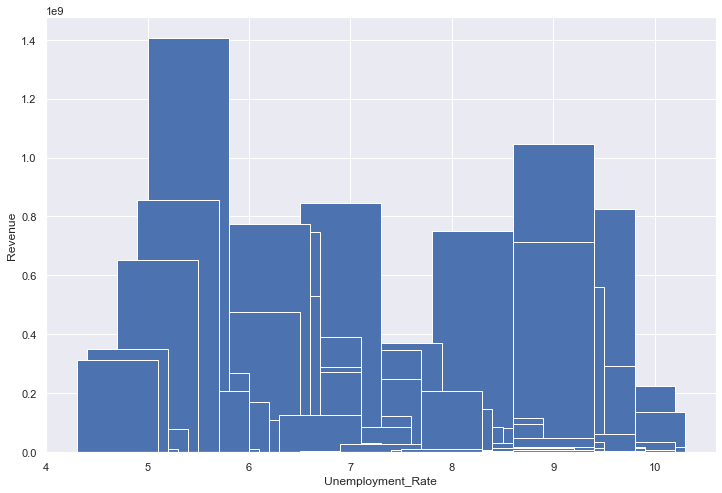

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
#Relationship between revenue and unemployement rate
plt.bar(df['Unemployment_Rate'], df['revenue'])
plt.xlabel('Unemployment_Rate')
plt.ylabel('Revenue')
plt.show()

<AxesSubplot:xlabel='revenue'>

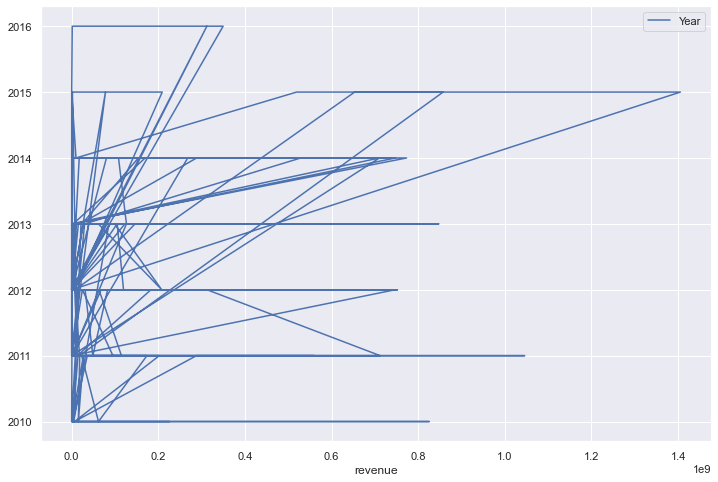

In [120]:
ax = plt.gca()
df.plot(kind='line',x='revenue',y='Year',ax=ax)

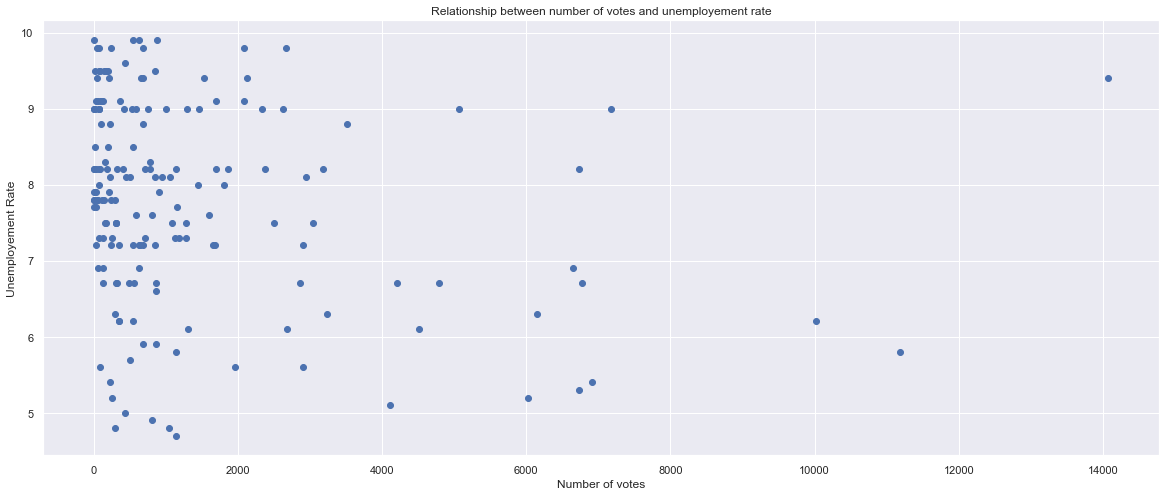

In [174]:
#Relationship between number of votes and unemployement rate
plt.scatter(df['vote_count'], df['Unemployment_Rate'])
plt.xlabel('Number of votes')
plt.ylabel('Unemployement Rate')
plt.title("Relationship between number of votes and unemployement rate")
plt.show()

Text(0.5, 1.0, 'Revenue Boxplot')

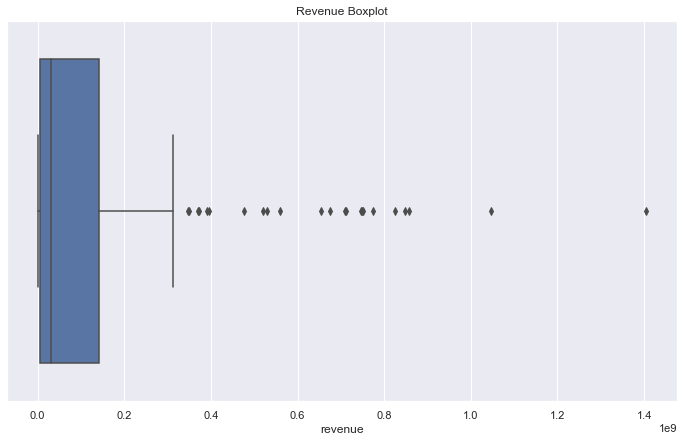

In [106]:
f, ax = plt.subplots(1, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.revenue, ax = ax)
ax.set_title("Revenue Boxplot")

Text(0, 0.5, 'Count')

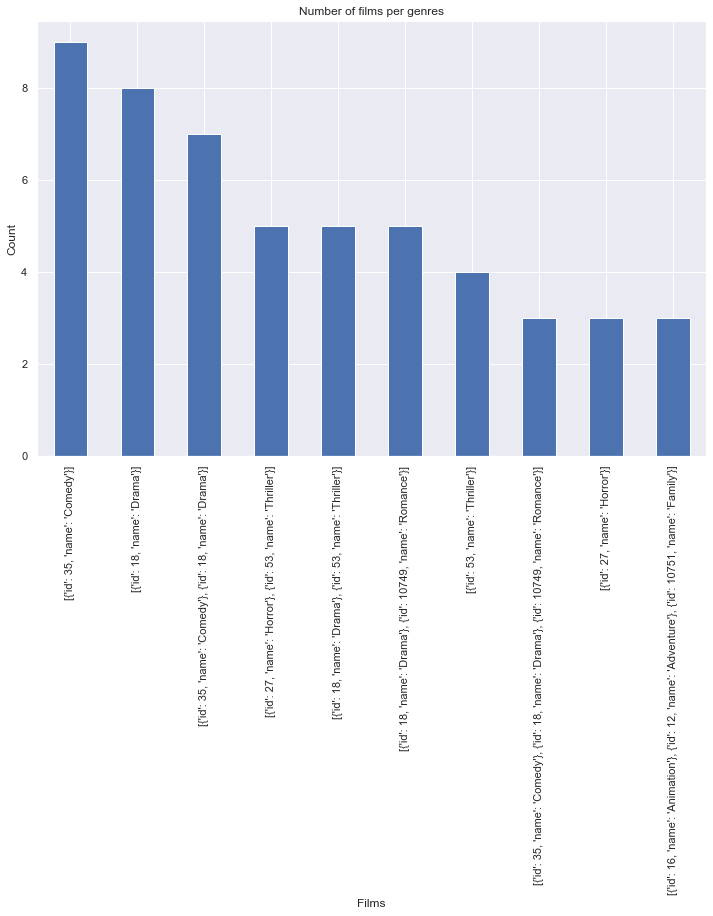

In [168]:
#Number of films per genres
df.genres.value_counts()[:10].plot.bar()
plt.title("Number of films per genres")
plt.xlabel('Films')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

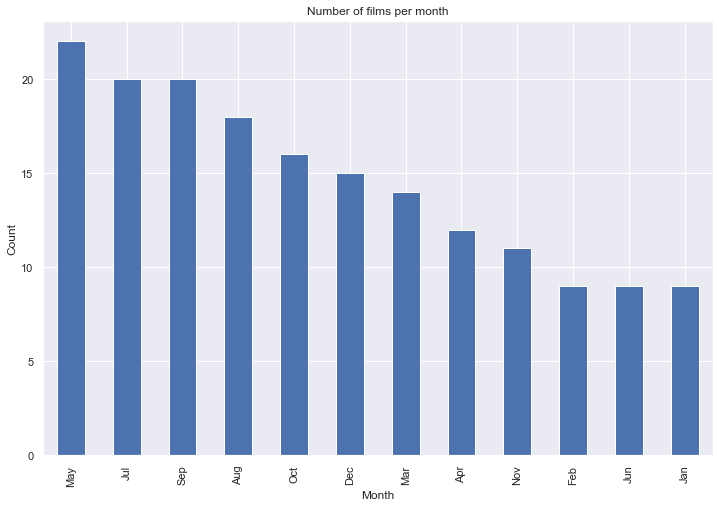

In [160]:
#Number of films per month
sns.set(rc={'figure.figsize':(12,8)})
df.Month.value_counts().plot.bar()
plt.title('Number of films per month')
plt.xlabel('Month')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

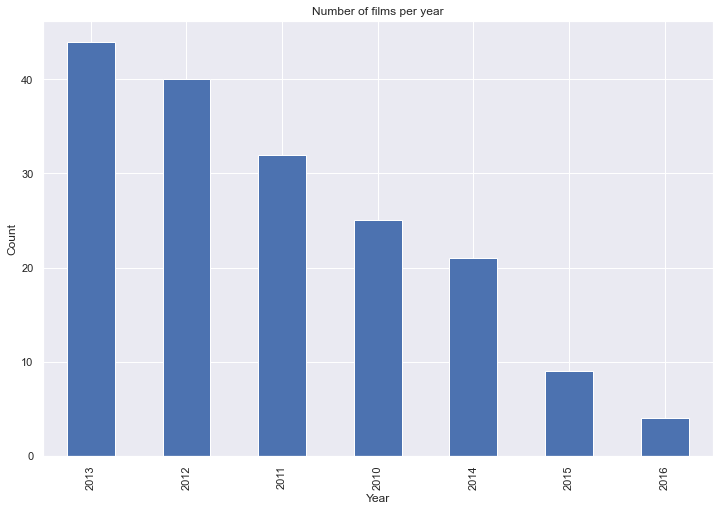

In [181]:
#Number of films per year
sns.set(rc={'figure.figsize':(12,8)})
df.Year.value_counts().plot.bar()
plt.title('Number of films per year')
plt.xlabel('Year')
plt.ylabel('Count')

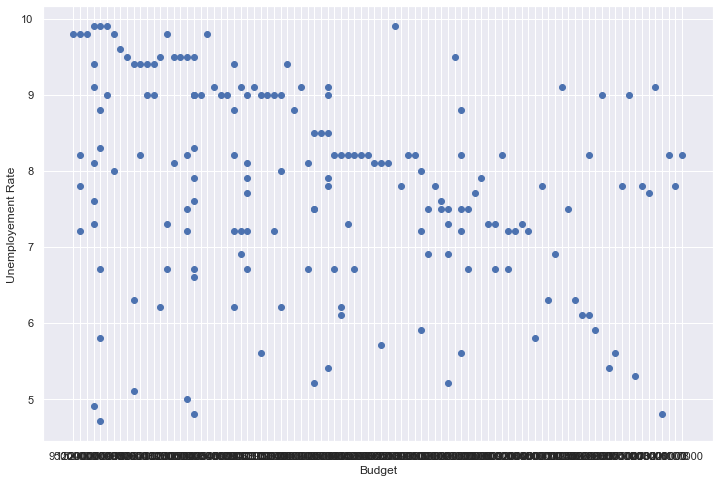

In [125]:
plt.scatter(df['budget'], df['Unemployment_Rate'])
plt.xlabel('Budget')
plt.ylabel('Unemployement Rate')
plt.show()

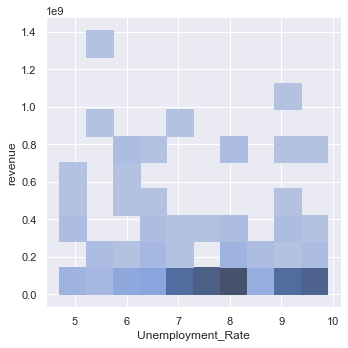

In [138]:
ax = sns.displot(df,x="Unemployment_Rate", y="revenue",bins=10)


<AxesSubplot:xlabel='Unemployment_Rate', ylabel='revenue'>

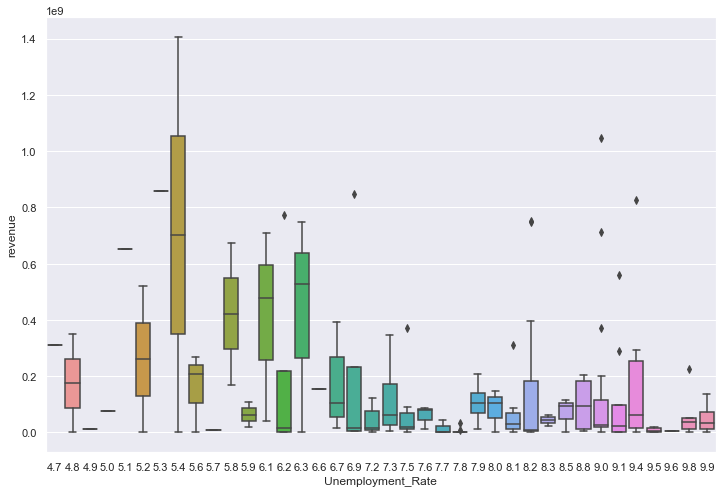

In [146]:
sns.boxplot(x="Unemployment_Rate",y="revenu",data=df)

In [179]:
rating_avg = df.groupby('title')['avg_rating_x'].mean()
rating_avg.head()

title
127 Hours             3.300000
13 Sins               3.125000
17 Girls              2.875000
30 Minutes or Less    3.500000
5 Days of War         3.428734
Name: avg_rating_x, dtype: float64

In [157]:
count = df['genres'].count()
count

175

Text(0, 0.5, 'Count')

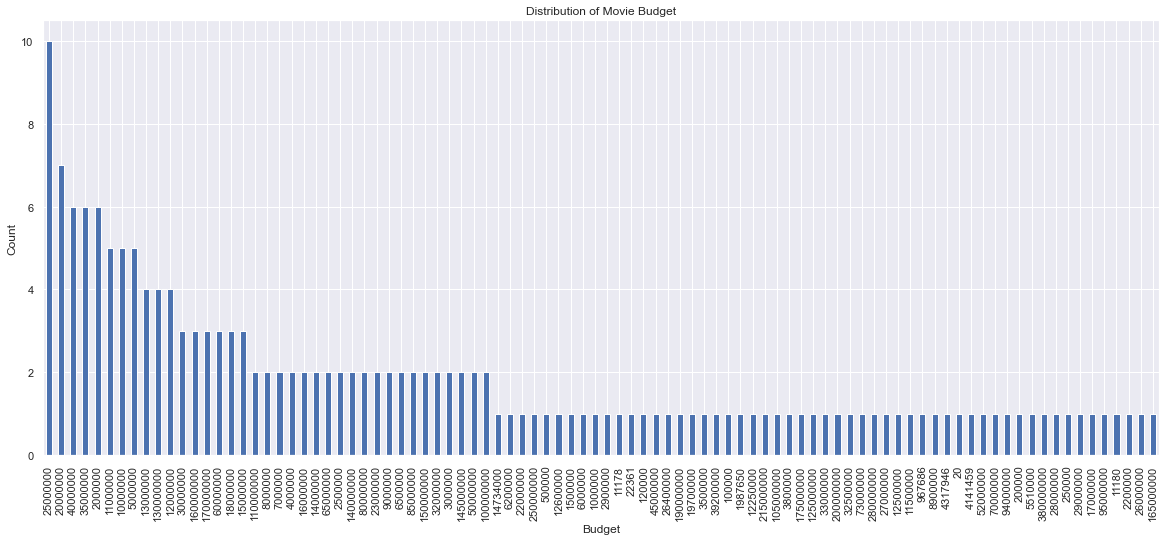

In [173]:
sns.set(rc={'figure.figsize':(20,8)})
df.budget.value_counts().plot.bar()
plt.title('Distribution of Movie Budget')
plt.xlabel('Budget')
plt.ylabel('Count')

In [180]:
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg.head()

title
Labor Day                           4.5
Resident Evil: The Final Chapter    4.0
The Call                            4.0
The Rover                           4.0
Guardians of the Galaxy             4.0
Name: avg_rating_x, dtype: float64

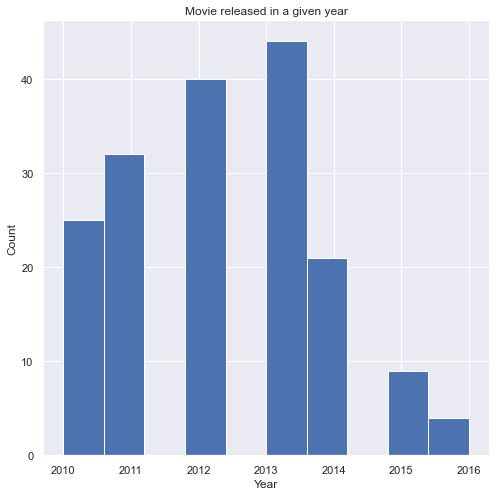

In [186]:
plt.figure(figsize=(8,8))
df.Year.plot.hist()
plt.title('Movie released in a given year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [187]:
df.corr()

,id,revenue,vote_average,vote_count,Year,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Unemployment_Rate,avg_rating_x,num_ratings_x,avg_rating_y,num_ratings_y
id,1.000000,-0.087562,0.028175,-0.075693,0.707563,-0.708152,-0.711924,-0.679338,-0.685651,-0.701532,-0.688233,-0.676407,-0.707017,-0.716327,-0.676513,-0.703187,-0.196529,-0.141303,-0.196529,-0.141303
revenue,-0.087562,1.000000,0.287861,0.805757,0.228177,-0.227539,-0.223252,-0.249492,-0.255921,-0.249611,-0.230852,-0.133822,-0.215926,-0.227886,-0.253603,-0.245903,0.027687,-0.039167,0.027687,-0.039167
vote_average,0.028175,0.287861,1.000000,0.440151,0.025035,-0.069596,-0.062450,-0.063821,-0.050889,-0.065259,-0.053502,-0.020338,-0.068490,-0.046946,-0.074689,-0.061507,0.015205,0.000121,0.015205,0.000121
vote_count,-0.075693,0.805757,0.440151,1.000000,0.186382,-0.215352,-0.208129,-0.209222,-0.227132,-0.216810,-0.206594,-0.123328,-0.201781,-0.193252,-0.228387,-0.214682,0.068793,0.000218,0.068793,0.000218
Year,0.707563,0.228177,0.025035,0.186382,1.000000,-0.963689,-0.969283,-0.960892,-0.952327,-0.977368,-0.957873,-0.867539,-0.971291,-0.975015,-0.956112,-0.978235,-0.220904,-0.146029,-0.220904,-0.146029
Primary_School,-0.708152,-0.227539,-0.069596,-0.215352,-0.963689,1.000000,0.964101,0.963315,0.944809,0.979733,0.964164,0.860835,0.980826,0.972364,0.965173,0.981534,0.216789,0.163070,0.216789,0.163070
High_School,-0.711924,-0.223252,-0.062450,-0.208129,-0.969283,0.964101,1.000000,0.937468,0.960989,0.983344,0.959457,0.866599,0.977175,0.982207,0.958144,0.983405,0.234156,0.145043,0.234156,0.145043
Associates_Degree,-0.679338,-0.249492,-0.063821,-0.209222,-0.960892,0.963315,0.937468,1.000000,0.921300,0.967585,0.952002,0.860571,0.959897,0.955123,0.965002,0.971042,0.186165,0.185607,0.186165,0.185607
Professional_Degree,-0.685651,-0.255921,-0.050889,-0.227132,-0.952327,0.944809,0.960989,0.921300,1.000000,0.977077,0.952879,0.857044,0.959179,0.967815,0.951778,0.977843,0.215466,0.124204,0.215466,0.124204
White,-0.701532,-0.249611,-0.065259,-0.216810,-0.977368,0.979733,0.983344,0.967585,0.977077,1.000000,0.966472,0.864661,0.989496,0.989540,0.974420,0.998084,0.213769,0.140847,0.213769,0.140847
